# Maximização de Lucro na Detecção de Fraudes em Cartões de Crédito

## Introdução:

No mundo das transações financeiras, a detecção de fraudes em cartões de crédito é uma questão de extrema importância. Fraudes representam não apenas perdas financeiras para instituições financeiras e clientes, mas também abalam a confiança no sistema financeiro como um todo. Neste trabalho, nosso objetivo é desenvolver um algoritmo eficaz para a detecção de fraudes em transações de cartões de crédito, focando na maximização do lucro para a empresa.

## Matriz de confusão no contexto:

Usaremos dos valores referentes a matriz de confusão para calcular a função lucro, no contexto:
    
   **Verdadeiro Positivo (TP)**: Refere-se às transações fraudulentas que foram corretamente identificadas como fraudulentas pelo modelo. Quando o modelo identifica corretamente uma transação como fraudulenta, não há perdas financeiras associadas a essa transação.

   **Falso Positivo (FP)**: 
    Refere-se às transações não fraudulentas que foram incorretamente identificadas como fraudulentas pelo modelo. Quando o modelo classifica erroneamente uma transação legítima como fraudulenta, pode resultar em inconveniências para o cliente e custos adicionais para a empresa, como investigações de fraude e possível reembolso.

   **Verdadeiro Negativo (TN)**: Refere-se às transações não fraudulentas que foram corretamente identificadas como não fraudulentas pelo modelo. Quando o modelo identifica corretamente uma transação legítima como não fraudulenta, não há perdas financeiras associadas a essa transação.

   **Falso Negativo (FN)**: Refere-se às transações fraudulentas que foram incorretamente identificadas como não fraudulentas pelo modelo. Quando o modelo falha em identificar uma transação fraudulenta, pode resultar em perdas financeiras significativas para a empresa, incluindo o custo da transação fraudulenta e possíveis custos adicionais associados à recuperação do valor e à proteção contra futuras fraudes.

## Lucro por transação:

No nosso modelo usaremos uma função lucro, através dessa função iremos elaborar um algoritimo que maximize o lucro do banco

   **Para verdadeiros negativos (TN)**: O lucro é calculado como 0.05 vezes a média do valor das transações não fraudulentas (x), pois não há custos associados a transações legítimas.
   
   **Para falsos positivos (FP)**: O lucro é calculado como o custo fixo por problemas técnicos com o cliente (custo_fp), pois o modelo classificou erroneamente uma transação legítima como fraudulenta.
   
   **Para falsos negativos (FN)**: O lucro é calculado como a média do valor das transações fraudulentas (z), pois o modelo falhou em identificar uma transação fraudulenta.
   
   Então o lucro será:
   
   **Lucro** = tn * 0.05 * x + fp * custo_fp + fn * z 
   
   Onde:
   
   **tn** = verdadeiros negativos
   
   **0.05** = é a porcentagem que o banco ganha por transação correta, o valor foi escolhido de forma arbritária, mas não ira interferir nos resultados
   
   **fp** = falsos positivos
   
   **custo_fp** = custo fixo padrão, será escolhido um custo de manutenção no valor de 50, esse custo assumirá valores negativos na formula
   
   **fn** = falsos negativos
   
   **z** = média dos valores de transações fraudulentos, essa média assumirá valores negativos na formula

**O lucro também será dividido pelo tamanho da amostra, para que haja uma medida per capta, compatível com amostras de tamanhos diferentes**
   

## Conjunto de dados

O conjunto de dados contém transações feitas por cartões de crédito em setembro de 2013 por titulares de cartões europeus.
Este conjunto de dados apresenta transações que ocorreram em dois dias, onde temos 492 fraudes em 284.807 transações. O conjunto de dados é altamente desbalanceado, a classe positiva (fraudes) representa 0,172% de todas as transações.


Ele contém apenas variáveis de entrada numéricas que são o resultado de uma transformação PCA. Infelizmente, devido a questões de confidencialidade, não foi fornecida as características originais e mais informações de fundo sobre os dados. As características V1, V2, ... V28 são os componentes principais obtidos com PCA, as únicas características que não foram transformadas com PCA são 'Time' e 'Amount'. A característica 'Time' contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. A característica 'Amount' é o valor da transação, esta característica pode ser usada, por exemplo, para aprendizado sensível ao custo dependente da amostra. A característica 'Class' é a variável de resposta e assume o valor 1 em caso de fraude e 0 caso contrário.

Os dados podem ser obtidos aqui: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import confusion_matrix, classification_report

In [88]:
data = pd.read_csv(r"C:\Users\joao\Desktop\fraude cartão de crédito\creditcard.csv")

**Antes vamos definir os valores de x, custo_fp e z na amostra toda**

In [89]:
x = data[data['Class'] == 0]['Amount'].mean()
z = - (data[data['Class'] == 1]['Amount'].mean())
custo_fp = - 50

In [90]:
print("A média do valor de uma transação não fraudulenta é :", x)
print("A média do valor de uma transação fraudulenta é :", -z)
print("O custo de manutenção é :", -custo_fp)

A média do valor de uma transação não fraudulenta é : 88.29102242231328
A média do valor de uma transação fraudulenta é : 122.21132113821139
O custo de manutenção é : 50


# Verificação das caracteristicas dos dados

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [92]:
#verificando se há alguma coluna nula
data.isnull().sum().any()
#Não há valores NULL

False

In [93]:
#Vamos agora verificar a proporção da classe objetivo no conjunto de dados

Text(0.5, 1.0, 'Contagem de Classes de Fraude em Cartões de Crédito')

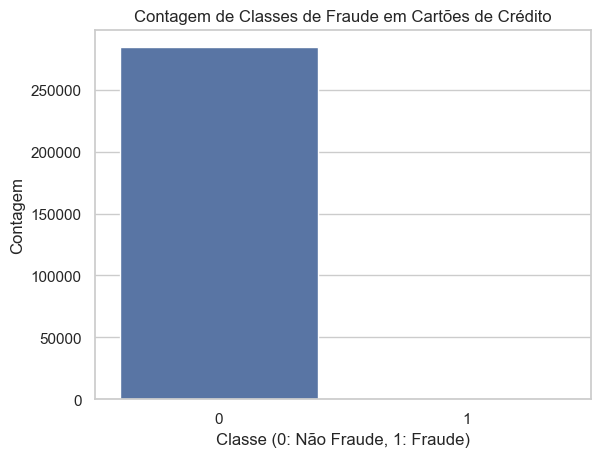

In [94]:
sns.countplot(x='Class', data=data)
plt.xlabel('Classe (0: Não Fraude, 1: Fraude)')
plt.ylabel('Contagem')
plt.title('Contagem de Classes de Fraude em Cartões de Crédito')

In [95]:
data['Class'].unique()

array([0, 1], dtype=int64)

In [96]:
len(data[data['Class'] == 0])

284315

In [97]:
len(data[data['Class'] == 1])

492

In [98]:
284315/284807

0.9982725143693799

**Há 284.315 instâncias que são não fraudulentas e 492 que são, totalizando 284.807 no total. Portanto, um algoritmo que preveja 'não fraudulento' para esse conjunto de dados acertará 99,8% das vezes. Faremos algo a respeito do desbalanceamento no futuro, mas agora vamos explorar as variáveis.** 

você pode ver mais aqui :https://en.wikipedia.org/wiki/Base_rate_fallacy

In [99]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Como foi descrito, todas as colunas foram transformadas devido à privacidade dos dados. Vamos transformar as colunas Time e Amount. Mas antes, vamos verificar as distribuições de densidade de cada uma.**

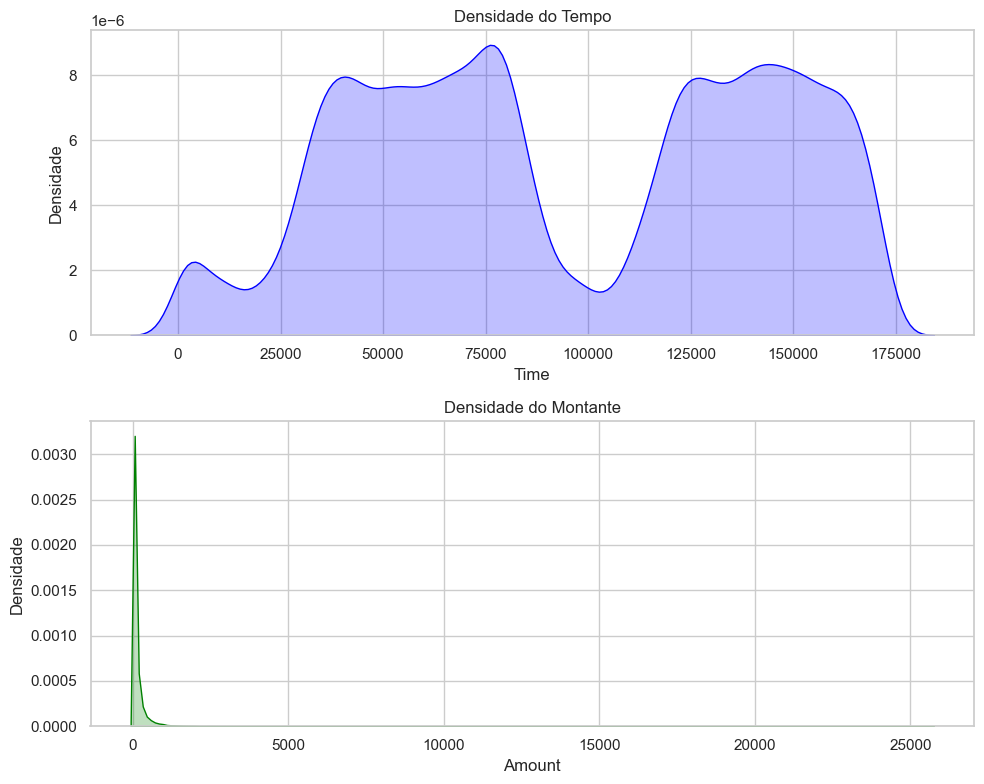

In [100]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot da coluna 'Time'
sns.kdeplot(data['Time'], shade=True, ax=axes[0], color='blue')
axes[0].set_title('Densidade do Tempo')
axes[0].set_ylabel('Densidade')

# Plot da coluna 'Amount'
sns.kdeplot(data['Amount'], shade=True, ax=axes[1], color='green')
axes[1].set_title('Densidade do Montante')
axes[1].set_ylabel('Densidade')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo os plots
plt.show()

**A densidade da coluna 'amount' parece estar concentrada muito em torno de uma média.**

**Já no caso da densidade do tempo, parece haver um possível ciclo nas densidades. Os valores aumentam e depois diminuem, possivelmente em determinados horários ocorrem mais transações. Se houvesse uma amostra maior, poderíamos usar técnicas de séries temporais para extrair alguma informação.**

**Mas agora podemos plotar o boxplot de 'amount' para cada classe, fraude ou não fraude. Pode ser que no caso de transações fraudulentas, os valores sejam diferentes dos valores não fraudulentos. Mas antes, iremos fazer uma transformação.**

**Usarei a transformação robusta, por não ter informação sobre a distribuição das amostras de 'Amount' e 'Time' e para lidar com alguns outliers sem perder as informações deles.**

In [101]:
from sklearn.preprocessing import RobustScaler
datat = data.copy()
rob_scalador = RobustScaler()
datat.iloc[:,:-1] = rob_scalador.fit_transform(datat.iloc[:,:-1])

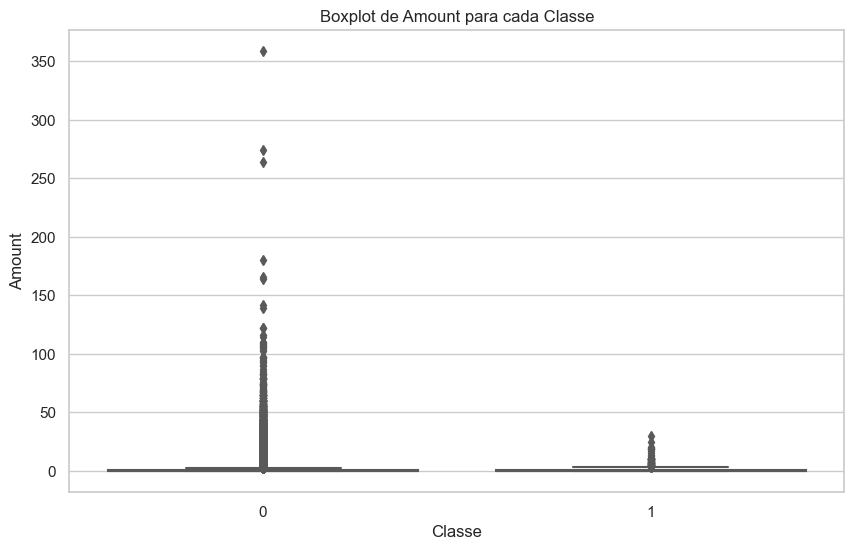

In [102]:
# Criando o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=datat, palette='Set2')

# Definindo os rótulos e título
plt.xlabel('Classe')
plt.ylabel('Amount')
plt.title('Boxplot de Amount para cada Classe')

# Exibindo o boxplot
plt.show()

**Observamos que não há valores muito altos nas transações fraudulentas. Uma explicação inicial para esse padrão pode ser o número limitado de instâncias fraudulentas em comparação com as transações legítimas.**

**Fraudadores podem deliberadamente evitar transações de alto valor para evitar detecção. Eles podem preferir transações de baixo valor, que são menos propensas a levantar suspeitas por parte das instituições financeiras ou dos titulares dos cartões.**

**Além disso, as instituições financeiras muitas vezes implementam medidas de segurança que identificam e bloqueiam automaticamente transações de alto valor como parte de suas estratégias de prevenção contra fraudes.**

**Mas agora iremos proseguir**

# Separação em conjunto de teste e e treinamento

A separação de um conjunto de teste e treinamento é essencial, porque:

   1. **Simula a capacidade do modelo de generalizar para novos exemplos que não foram vistos durante o treinamento, já que durante o treinamento o modelo tenta ao máximo se adptar a dados do treinamento**

   2. **Evita o "overfitting" ou sobreajuste. Isso ocorre quando o modelo se adpta muito bem ao conjunto de treinamento mas não ao conjunto de teste, isso ocorre quando o modelo grava padrões que não são generalizados para amostras em gerais, mas somente para a amostra no conjunto de treinamento**
   
   3. **Evita a escolha de hiperparametros que são particulares do conjunto de treinamento, já que na etapa de teste o modelo será avaliado com dados que não foram usados na escolha dos hiperparametros**
   
# A estratégia de separação será a seguinte:
 
 1. **Primeiro vamos separar os dados em três conjuntos: treinamento, validação e teste, em uma proporção de 90/5/5.**
  
 2. **No conjunto de treinamento, iremos separar uma amostra balanceada, com o mesmo número de instâncias tanto para casos de fraude quanto para casos sem fraude.**

 3. **Assim, o conjunto de treinamento será com uma amostra balanceada, enquanto o conjunto de validação e teste será com uma amostra desbalanceada, mantendo a proporção da amostra original. Utilizei essa estratégia porque, apesar do conjunto de treinamento ser com uma amostra desbalanceada, o de validação não. Portanto, o feedback será com uma simulação da amostra real.**


In [103]:
X = datat.drop('Class', axis=1)
y = datat['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [104]:
X = datat.drop('Class', axis=1)
y = datat['Class']

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, stratify=y_test_val, random_state=42)

print("Proporção de classes em y_train:", y_train.value_counts(normalize=True))
print("Proporção de classes em y_val:", y_val.value_counts(normalize=True))
print("Proporção de classes em y_test:", y_test.value_counts(normalize=True))

Proporção de classes em y_train: Class
0    0.998272
1    0.001728
Name: proportion, dtype: float64
Proporção de classes em y_val: Class
0    0.998245
1    0.001755
Name: proportion, dtype: float64
Proporção de classes em y_test: Class
0    0.998315
1    0.001685
Name: proportion, dtype: float64


In [105]:
datatrain = X_train.join(y_train)

In [106]:
dfsample = datatrain.sample(frac=1).copy()
dffraude = dfsample[dfsample['Class'] == 1]
dfnofraude = dfsample.loc[dfsample['Class'] == 0][:443]
dfconc = pd.concat([dffraude, dfnofraude])
sample_df = dfconc.sample(frac=1, random_state=42)

In [107]:
X_train = sample_df.drop('Class', axis=1)
y_train = sample_df['Class']

Text(0.5, 1.0, 'Contagem de Classes de Fraude em Cartões de Crédito')

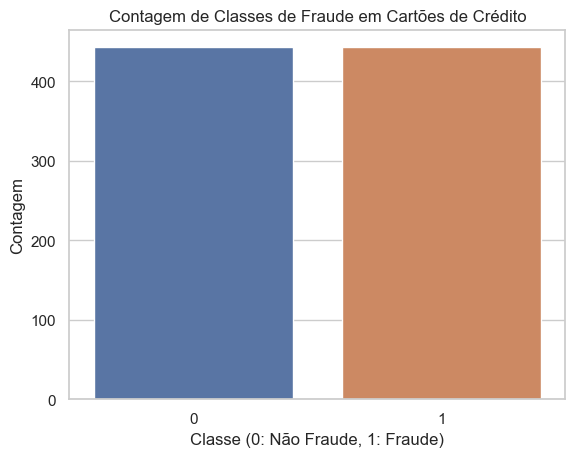

In [108]:
sns.countplot(x='Class', data=sample_df)
plt.xlabel('Classe (0: Não Fraude, 1: Fraude)')
plt.ylabel('Contagem')
plt.title('Contagem de Classes de Fraude em Cartões de Crédito')

**Temos agora uma amostra balanceada, podemos seguir para a análise de correlação**

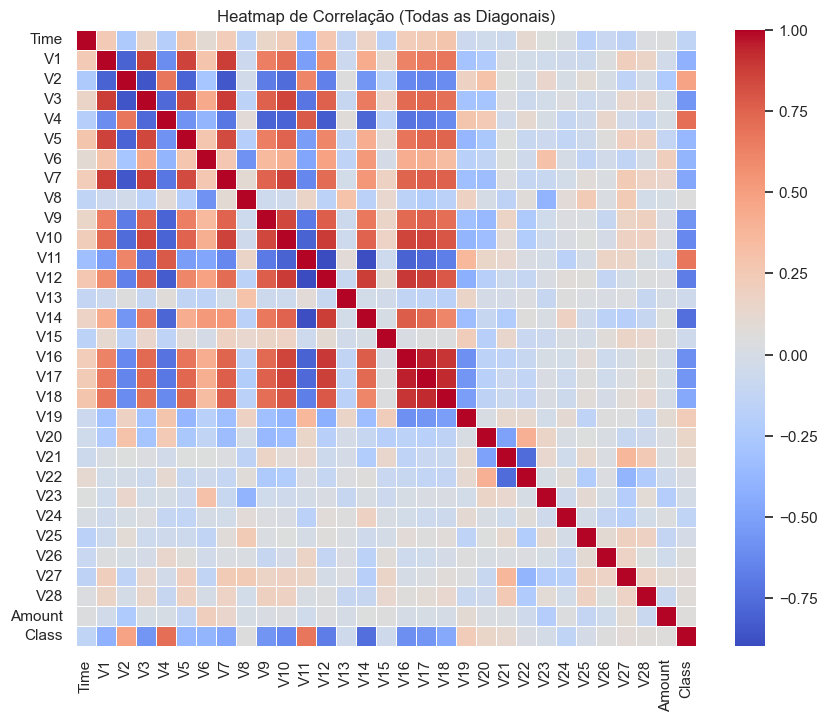

In [109]:
corr_matrix = sample_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Heatmap de Correlação (Todas as Diagonais)')
plt.show()

**Observe que uma correlação alta entre variáveis, como aquela observada entre as colunas V16, V17 e V18, pode influenciar os resultados das previsões. Dado que essas colunas variam de forma proporcional, durante o treinamento, é como se a mesma informação estivesse sendo repetida três vezes. Isso pode distorcer o modelo e levar a resultados enviesados.**

**Podemos usar o PCA para buscar um número adequado de componentes sem perder o poder de explicação**

## O PCA (Principal Component Analysis):

**é uma técnica estatística que pode ser usada para redução de dimensão e extração de informação quando o conjunto de dados é muito complexo. A vantagem do pca é que ele permite o acompanhamento da variancia dos dados conforme se muda o número de componentes. Então podemos escolher um número de componentes menor do que o conjunto original e que ao mesmo tempo seja eficiente na previsão**

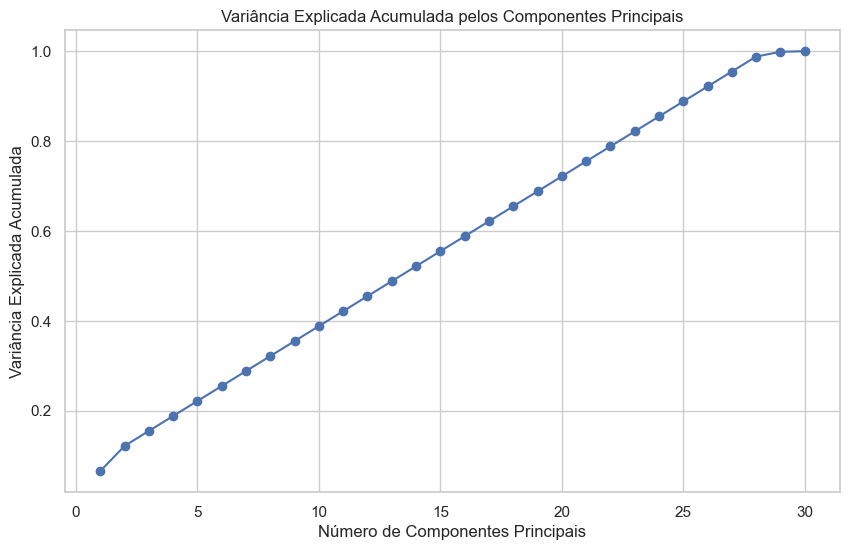

In [110]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_padronizado = scaler.fit_transform(datat.iloc[:,:-1])

pca = PCA()
pca.fit(X_padronizado)

variancia_explicada = pca.explained_variance_ratio_

variancia_explicada_acumulada = np.cumsum(variancia_explicada)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variancia_explicada) + 1), variancia_explicada_acumulada, marker='o', linestyle='-')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada pelos Componentes Principais')
plt.grid(True)
plt.show()

**Decidi manter a amostra original neste caso específico, pois a variação dos componentes muda quase linearmente, indicando que eles têm importância semelhante.** 

**Também A decisão de manter o número de instâncias intactas, sem remover quaisquer outliers, foi tomada devido à possibilidade de que esses valores atípicos sejam importantes durante a modelagem, especialmente em casos de fraudes de cartão de crédito.**

## Conjunto de treinamento, teste e validação

**O conjunto de treinamento possui uma amostra com classes de objetivos balanceadas, contendo 443 instâncias fraudulentas e 443 não fraudulentas.**

**A amostra de validação consiste em 14.241 instâncias, com 14.216 não fraudulentas e 25 fraudulentas.**

**Já a amostra de teste é composta por 14.240 instâncias, das quais 14.216 são não fraudulentas e 24 são fraudulentas.**

**Optei por manter o conjunto de teste balanceado e o conjunto de validação com a mesma proporção do conjunto original. Dessa forma, teremos um treinamento menos enviesado para as amostras não fraudulentas, ao mesmo tempo em que a validação reflete a realidade.**

## Etapas do treinamento

1. **Na primeira etapa do treinamento, utilizaremos os modelos sem nenhum hiperparâmetro específico. Dessa forma, teremos modelos base para que possamos realizar comparações ao buscar os melhores hiperparâmetros.**

2. **Na segunda etapa, faremos uma busca pelos melhores hiperparâmetros para cada algoritmo.**

3. **Finalmente, na terceira etapa, utilizaremos a amostra de teste para selecionar o algoritmo que proporcionou o maior lucro.**

**A função utilizada no conjunto de validação será a função lucro conforme apresentada:**

**Lucro = tn * 0.05 * x + fp * custo_fp + fn * z**

## Resumo dos Algoritmos de Classificação

1. **K-Nearest Neighbors (KNN)**:
   - **Funcionamento**: Classifica os pontos de dados com base na classe majoritária dos k vizinhos mais próximo

2. **Regressão Logística (Logistic Regression)**:
   - **Funcionamento**: Modela a probabilidade de uma classe específica usando a função logística, aplicando uma transformação linear aos recursos.

3. **Support Vector Classifier (SVC)**:
   - **Funcionamento**: Encontra o hiperplano que melhor separa as classes no espaço de características, maximizando a margem entre as classes.

4. **Decision Tree Classifier**:
   - **Funcionamento**: Constrói uma árvore de decisão recursiva dividindo os dados com base nos recursos, visando maximizar a "pureza" das folhas.

## Modelos com com configurações padrão:

In [111]:
# Inicializar modelos com configurações padrão
logistic_model = LogisticRegression(solver='lbfgs')
knn_model = KNeighborsClassifier()
svc_model = SVC()
dt_model = DecisionTreeClassifier()

# Treinar os modelos
logistic_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Fazer previsões no conjunto de validação
y_pred_val_logistic = logistic_model.predict(X_val)
y_pred_val_knn = knn_model.predict(X_val)
y_pred_val_svc = svc_model.predict(X_val)
y_pred_val_dt = dt_model.predict(X_val)

# Calcular as matrizes de confusão no conjunto de validação
tn_logistic, fp_logistic, fn_logistic, tp_logistic = confusion_matrix(y_val, y_pred_val_logistic).ravel()
tn_knn, fp_knn, fn_knn, tp_knn = confusion_matrix(y_val, y_pred_val_knn).ravel()
tn_svc, fp_svc, fn_svc, tp_svc = confusion_matrix(y_val, y_pred_val_svc).ravel()
tn_dt, fp_dt, fn_dt, tp_dt = confusion_matrix(y_val, y_pred_val_dt).ravel()

# Calcular o lucro no conjunto de validação para cada modelo
lucro_logistic = tn_logistic * 0.05 * x + fp_logistic * custo_fp + fn_logistic * z
lucro_knn = tn_knn * 0.05 * x + fp_knn * custo_fp + fn_knn * z
lucro_svc = tn_svc * 0.05 * x + fp_svc * custo_fp + fn_svc * z
lucro_dt = tn_dt * 0.05 * x + fp_dt * custo_fp + fn_dt * z

total_clientes = len(y_val)

# Calcular o lucro por cliente para cada modelo
lucro_por_cliente_logistic = lucro_logistic / total_clientes
lucro_por_cliente_knn = lucro_knn / total_clientes
lucro_por_cliente_svc = lucro_svc / total_clientes
lucro_por_cliente_dt = lucro_dt / total_clientes

# Imprimir o lucro por cliente para cada modelo
print("Lucro por cliente no conjunto de validação para Logistic Regression com configurações padrão é:", lucro_por_cliente_logistic)
print("Lucro por cliente no conjunto de validação para KNN com configurações padrão é:", lucro_por_cliente_knn)
print("Lucro por cliente no conjunto de validação para SVC com configurações padrão é:", lucro_por_cliente_svc)
print("Lucro por cliente no conjunto de validação para Decision Tree com configurações padrão é:", lucro_por_cliente_dt)

Lucro por cliente no conjunto de validação para Logistic Regression com configurações padrão é: 2.6128832121469747
Lucro por cliente no conjunto de validação para KNN com configurações padrão é: 1.8639714770343658
Lucro por cliente no conjunto de validação para SVC com configurações padrão é: 3.1669250570006913
Lucro por cliente no conjunto de validação para Decision Tree com configurações padrão é: -1.1278544851757013


## Otimização dos hiperparâmetros

In [112]:
# Definir os modelos e os parâmetros
modelos = {
    'LogisticRegression': (LogisticRegression(solver='lbfgs'), {"penalty": ['l2', 'none'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}),
    'KNeighborsClassifier': (KNeighborsClassifier(), {"n_neighbors": list(range(2, 5, 1))}),
    'SVC': (SVC(), {'C': [0.0001,0.3,0.5, 0.7, 0.9, 1], 'kernel': ['rbf','sigmoid', 'linear']}),
    'DecisionTreeClassifier': (DecisionTreeClassifier(), {"criterion": ["gini", "entropy"], "max_depth": list(range(1, 6, 1)), "min_samples_leaf": list(range(5, 10, 1))})
}

melhores_modelos = {}
melhores_lucros = {}

# Iterar sobre os modelos e parâmetros
for model_name, (model, params) in modelos.items():
    for param in ParameterGrid(params):
        # Treinar o modelo com os parâmetros atuais
        clf = model.set_params(**param)
        clf.fit(X_train, y_train)
        
        # Fazer previsões no conjunto de validação
        y_pred_val = clf.predict(X_val)
        
        # Calcular a matriz de confusão no conjunto de validação
        tn, fp, fn, tp = confusion_matrix(y_val, y_pred_val).ravel()
        
        # Calcular o lucro no conjunto de validação
        lucro = tn * 0.05 * x + fp * custo_fp + fn * z
        
        # Verificar se esse modelo obteve o melhor lucro no conjunto de validação
        if model_name not in melhores_lucros or lucro > melhores_lucros[model_name]:
            melhores_lucros[model_name] = lucro
            melhores_modelos[model_name] = (param, clf)
total_clientes = len(y_val)
# Imprimir os melhores modelos e seus parâmetros
print("Melhores modelos e parâmetros encontrados:")
for model_name, (param, clf) in melhores_modelos.items():
    print("Modelo:", model_name)
    print("Parâmetros:", param)
    print("Lucro por cliente no conjunto de validação:", melhores_lucros[model_name]/total_clientes)
    print()


Melhores modelos e parâmetros encontrados:
Modelo: LogisticRegression
Parâmetros: {'C': 0.001, 'penalty': 'l2'}
Lucro por cliente no conjunto de validação: 4.2511431806929085

Modelo: KNeighborsClassifier
Parâmetros: {'n_neighbors': 2}
Lucro por cliente no conjunto de validação: 2.9644132102610574

Modelo: SVC
Parâmetros: {'C': 0.0001, 'kernel': 'linear'}
Lucro por cliente no conjunto de validação: 4.348609221796557

Modelo: DecisionTreeClassifier
Parâmetros: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 8}
Lucro por cliente no conjunto de validação: 2.845962884809573



Nossa busca pelos melhores hiperparâmetros foi um sucesso, todos algoritimos se sairam melhor que no conjunto base, Vamos agora usar esses modelos para calcular o lucro no conjunto de teste

## Conjunto de teste: 

Relatório de Avaliação para LogisticRegression:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     14216
           1       0.03      0.88      0.07        24

    accuracy                           0.96     14240
   macro avg       0.52      0.92      0.52     14240
weighted avg       1.00      0.96      0.98     14240


Relatório de Avaliação para KNeighborsClassifier:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     14216
           1       0.05      0.88      0.09        24

    accuracy                           0.97     14240
   macro avg       0.52      0.92      0.54     14240
weighted avg       1.00      0.97      0.98     14240


Relatório de Avaliação para SVC:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     14216
           1       0.04      0.88      0.08        24

    accuracy                           0.97     1

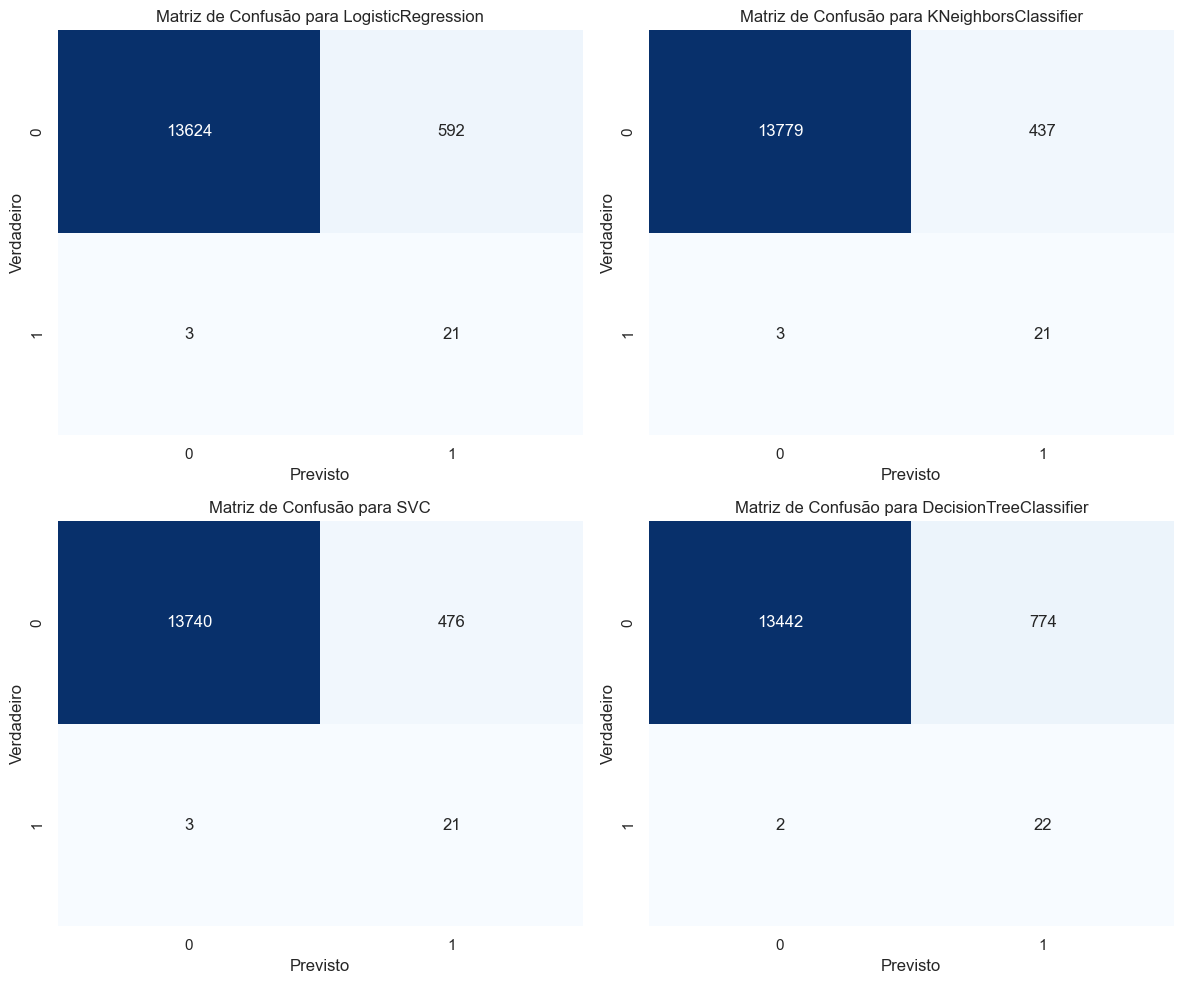

Lucro por cliente para LogisticRegression: 2.12
Lucro por cliente para KNeighborsClassifier: 2.71
Lucro por cliente para SVC: 2.56
Lucro por cliente para DecisionTreeClassifier: 1.43


In [113]:

# Imprimir todos os relatórios de métricas de avaliação
for model_name, (param, clf) in melhores_modelos.items():
    y_pred = clf.predict(X_test)
    print(f"Relatório de Avaliação para {model_name}:")
    print(classification_report(y_test, y_pred))
    print()

# Plotar as matrizes de confusão
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for idx, (model_name, (param, clf)) in enumerate(melhores_modelos.items()):
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    row = idx // 2
    col = idx % 2
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[row, col])
    axes[row, col].set_title(f"Matriz de Confusão para {model_name}")
    axes[row, col].set_xlabel("Previsto")
    axes[row, col].set_ylabel("Verdadeiro")

plt.tight_layout()
plt.show()

for model_name, (param, clf) in melhores_modelos.items():
    y_pred = clf.predict(X_test)  # Faça previsões no conjunto de teste

    # Calcula a matriz de confusão para o modelo atual
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calcula o lucro por cliente com base na matriz de confusão
    lucro_por_cliente = (tn * 0.05 * x + fp * custo_fp + fn * z) / len(y_test)

    # Imprime o lucro por cliente para o modelo atual
    print(f"Lucro por cliente para {model_name}: {lucro_por_cliente:.2f}")

**O lucro de cada algoritimo no conjunto de teste diminuiu, o que é normal, já que os dados do conjunto de treinamento não foram usados para o ajuste dos hiperparametros**

**O modelo que melhor se saiu bem foi o KNeighborsClassifier com um lucro por cliente de 2.71**

**Se considerarmos que o valor médio de transação não fraudulenta é 88 com 5% de lucro isso daria 4.4 de lucro por cliente o algoritimo que melhor se saiu KNeighborsClassifier teve um desempenho de 61.5% esse valor. Poderiamos usar o valor máximo de lucro por cliente como referencia para a melhora do algoritimo**

## Conclusão

**Através deste trabalho, realizamos uma simulação de um algoritmo de detecção de fraudes visando maximizar o lucro. Inicialmente, identificamos os valores relacionados às transações fraudulentas e não fraudulentas. Em seguida, exploramos o balanceamento das classes na amostra. Para lidar com esse desafio, optamos por dividir o conjunto de treinamento em instâncias balanceadas, enquanto validamos com uma amostra que representa a realidade. Decidimos não tratar outliers devido à falta de informações sobre as colunas relevantes. Além disso, com base nos testes de PCA, optamos por incluir todas as colunas no treinamento. Na fase de treinamento, escolhemos o modelo KNeighborsClassifier, que atingiu um desempenho de 60% do máximo possível. Este valor pode ser útil para guiar treinamentos futuros.**

# Alguns exemplos do que poderia ser feito a mais

1. **Usar ponderação de classe para atribuir peso diferente as instâncias**
2. **Usar algoritimos como GBM que lidam com amostras desbalanceada**
3. **Usar mais técnicas como SMOTE, que gera instâncias sintéticas da classe minoritária com base nas que já existem**

